# Basic linear regreshion model (Y = AX + B)<br>

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

Load the dataset

In [4]:
df = pd.read_csv('../../Datasets/USA_Housing.csv')
df.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


## Split to - X(Train), Y(Test) 
Create an X array that contains the features to train on, and a y array with the target variable - the Price column.
While we remove any non valuable data

In [16]:
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df[['Price']] # Can also give it another column to prredict 

Use sklearn.model_selection.train_test_split to split the data (train/test) <br>
We split the data to 70% and 30% , run the model on 70% data, and then test on the 30% and see if the results are close to the real values. 

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Create the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

## Train the Model<br>
We send it the X and the Y and it findes the A , B (from Y = AX + B).

In [20]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Information about the Model

Display the model coefficient/weiht. (The A from Y = AX + B).<br><br>
If one of the coefs is really small we can delete his feature from the dataset, and retrain the model.<br>
But, first have to check that this column doesn't have big numbers (like a salary), and than it's fine that it's coef is small.

In [21]:
model.coef_

array([[2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
        1.52165814e+01]])

Display the model intercept/bias (The B from Y = AX + B).<br>
The minimum value of every y (In this exmple, the minimum cose of every house).

In [22]:
model.intercept_

array([-2638673.42619132])

## Test the Model

Predict the test set, and than check it to decide if the model is good

In [25]:
predictions = model.predict(x_test)

Score - a math mathod <br>
A precent of 100

In [36]:
model.score(xScore - a math mathod_test,y_test)

0.9146818498753999

### Loss function
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
The following function shows us the error rate.<br>
It called **loss function**, because we want to minimize it.<br><br>
Why the mean square of the sum of the pow?<br>
Because if we got:<br>
y_test => 1,000,000 | predicted => 1,000,000 | t_test-predicted =>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0 (Perfect Model)<br>
y_test => 1,500,000 | predicted => 1,600,000 | t_test-predicted => -100,000<br>
y_test => 3,100,000 | predicted => 3,000,000 | t_test-predicted => &nbsp;100,000<br>
Mean: 0 (sum/n)<br>
RMSE: 50,000 (square(sum(pow)/n)) - The right answer.

In [37]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485538

**Scatter Graph**<br>
Use scatter graph with the test and the predictions.<br>
We want to see a perfect thin line.

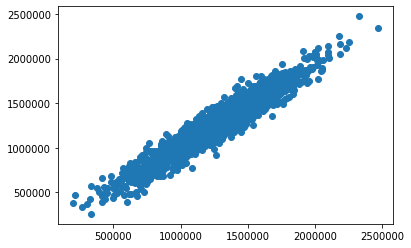

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)

**Residual Histogram**<br>
Create distplot with 50 bins for the error (real value - predicted).<br>
We want to see one long column exculy on the zero.

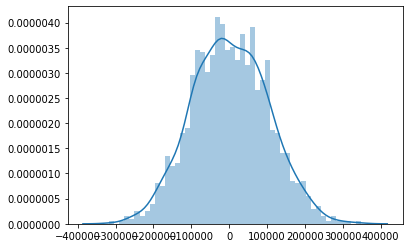

In [39]:
import seaborn as sb
sb.distplot(y_test-predictions,bins=50)